# Cluster Analysis

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Loading the Dataset

In [3]:
data = pd.read_csv("C:/Users/deval/OneDrive/Desktop/School/Projects/Cluster Analysis/archive/Coimbra_breast_cancer_dataset.csv")
print(data.head())

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


Data Preprocessing

In [4]:
X = data[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determining Optimal number of K

C:\Users\deval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

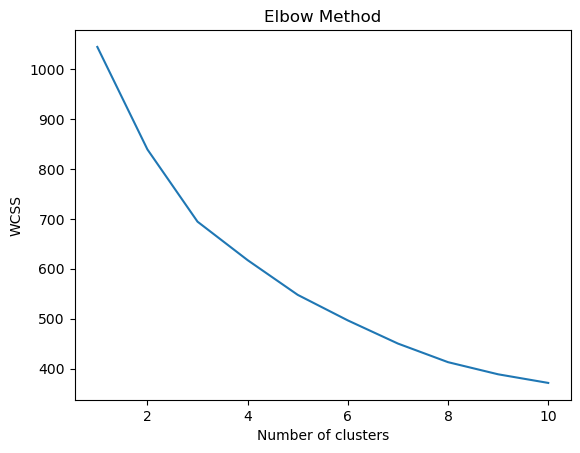

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

According to the above graph, the optimal k value should be 3
Fitting this k value in the k clustering model

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

C:\Users\deval\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualising the clusters

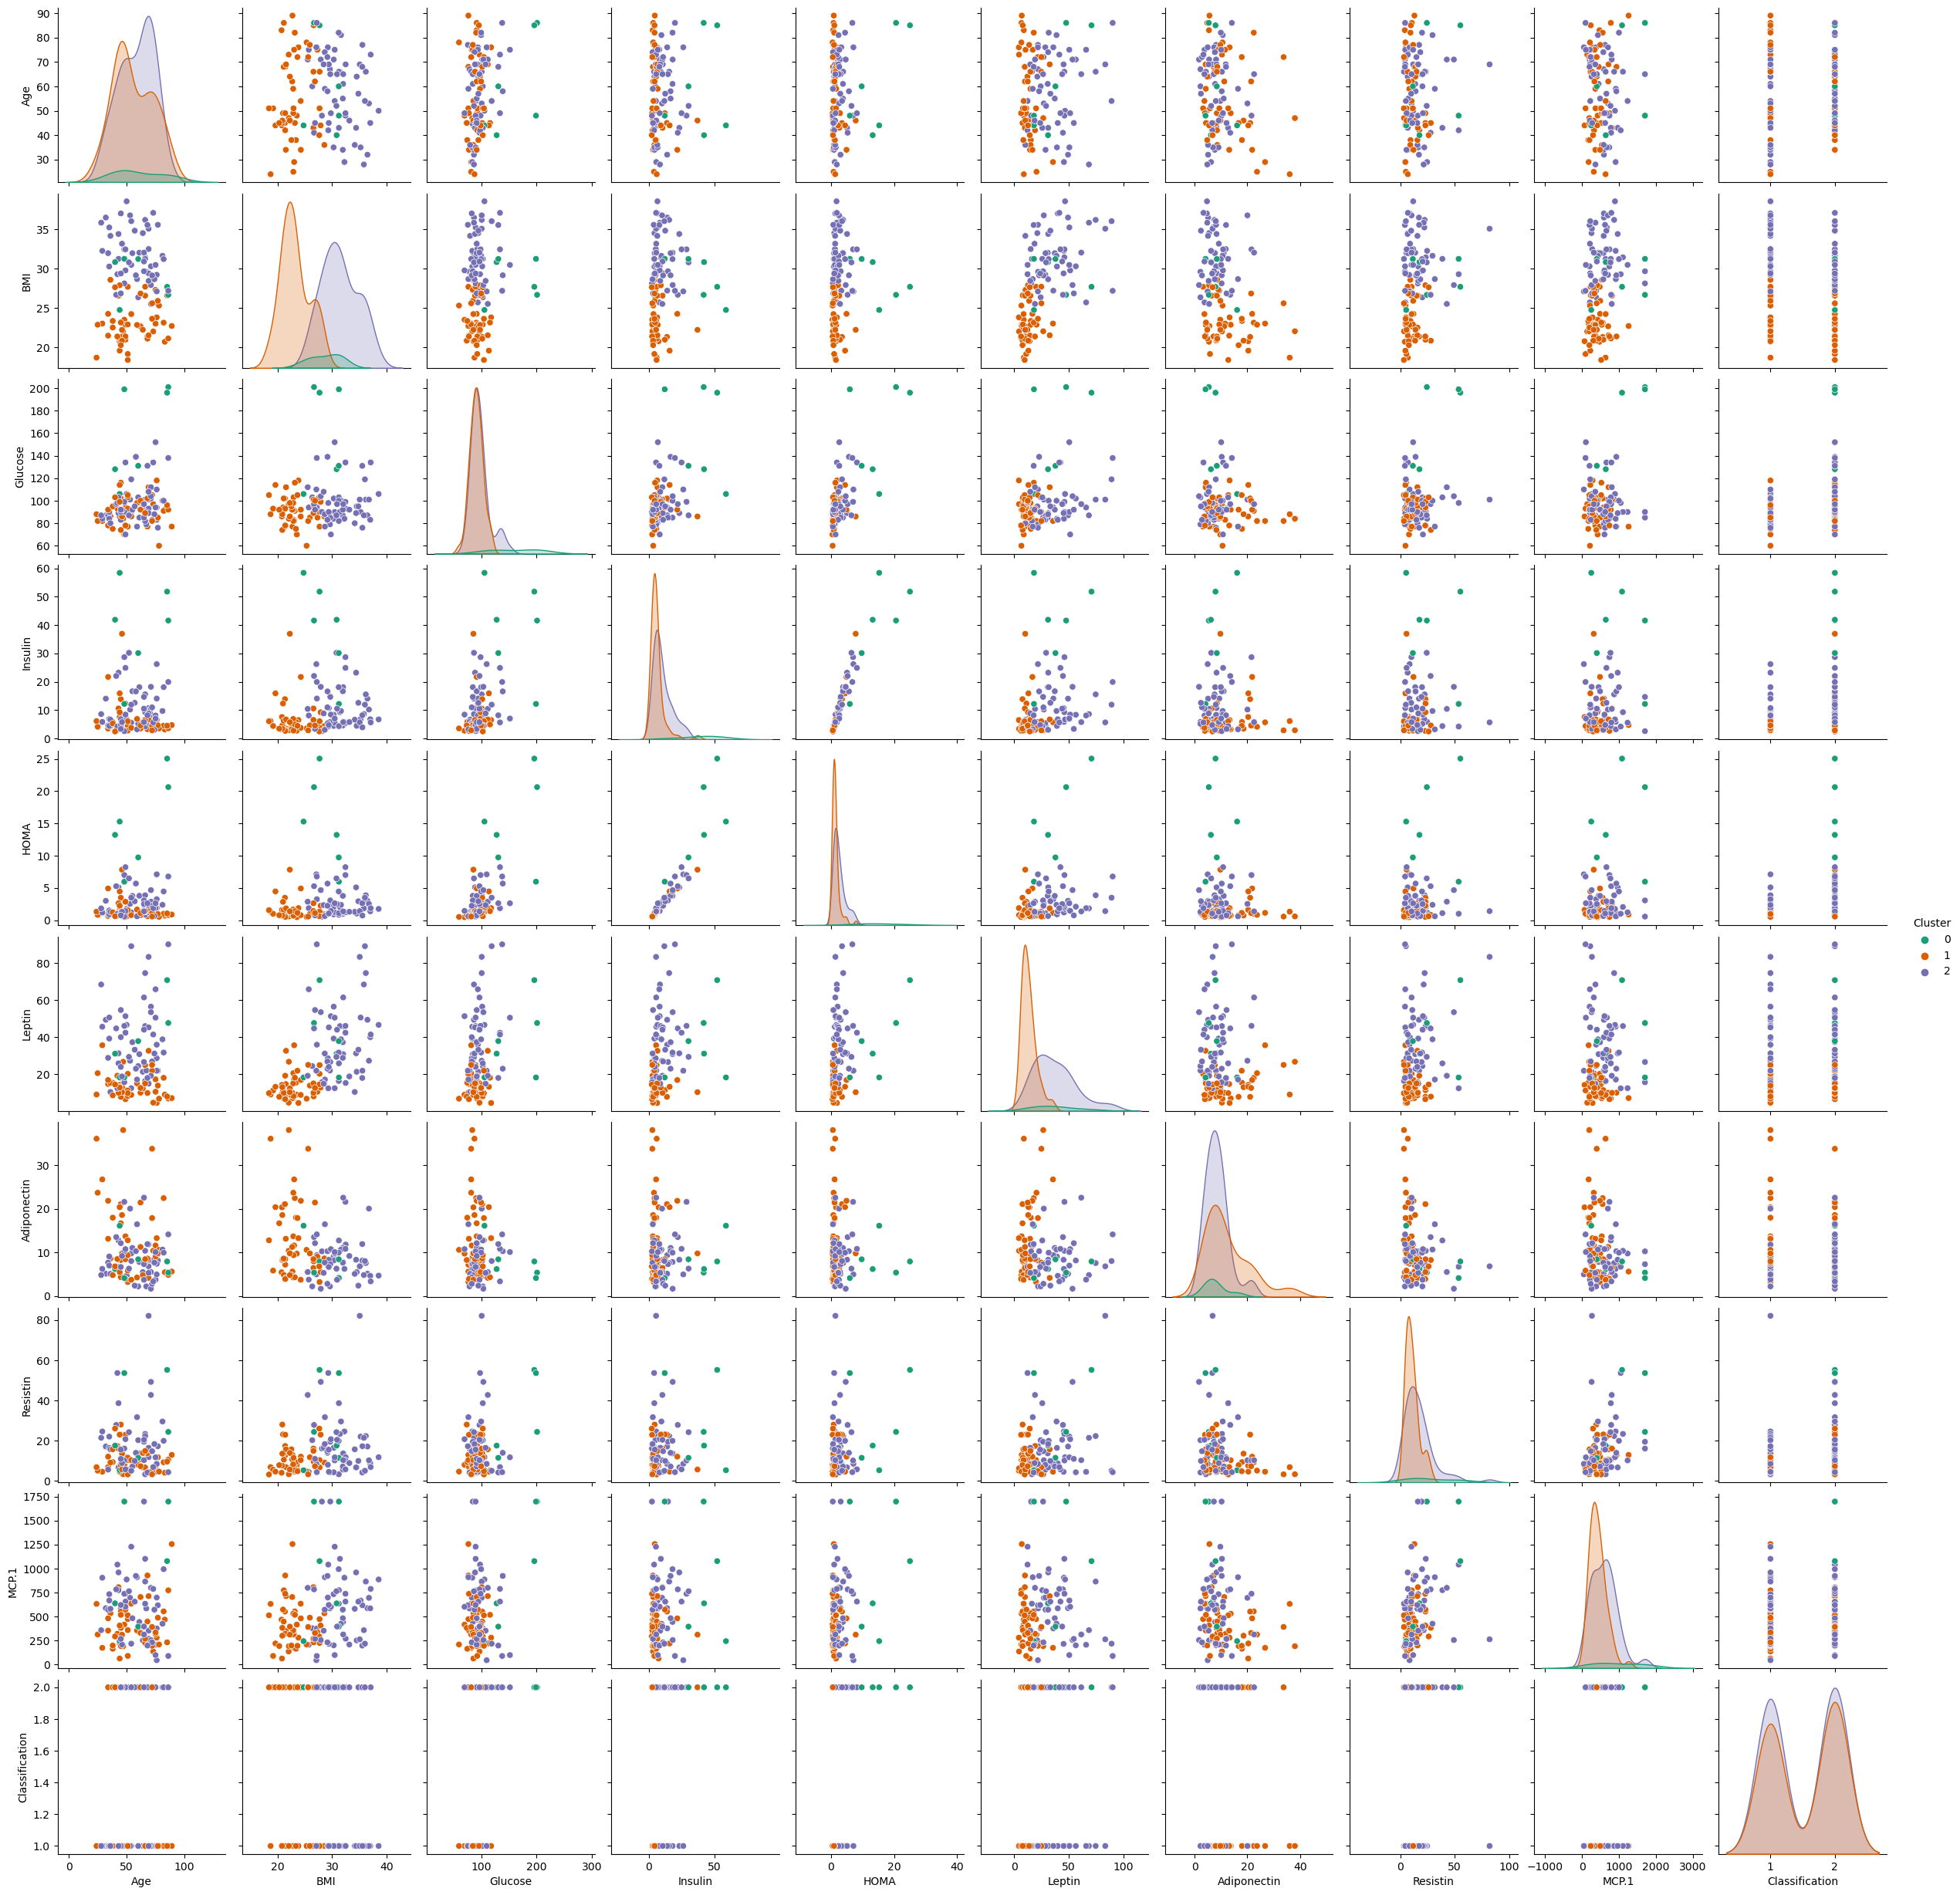

In [8]:
sns.pairplot(data, hue='Cluster', palette='Dark2')
plt.show()

Cluster Summary

In [9]:
cluster_summary = data.groupby('Cluster').agg(['mean', 'std']).transpose()
print(cluster_summary)

Cluster                       0           1           2
Age            mean   60.500000   55.653846   58.448276
               std    20.491462   17.001597   14.948065
BMI            mean   28.735564   23.144907   31.440971
               std     2.767899    2.584763    3.307885
Glucose        mean  160.166667   91.057692   97.379310
               std    43.078610   11.809623   16.882283
Insulin        mean   39.345167    6.182558   10.411000
               std    16.470113    5.631511    6.943707
HOMA           mean   14.983280    1.414850    2.571495
               std     7.002694    1.291699    1.887267
Leptin         mean   37.283717   13.318658   37.432359
               std    20.040521    6.760372   19.339024
Adiponectin    mean    8.004725   12.453883    8.368122
               std     4.273822    8.485949    4.460409
Resistin       mean   27.930213   10.726014   16.946173
               std    21.479941    6.202531   14.031767
MCP.1          mean  959.045167  418.607865  594

Cluster Box plots

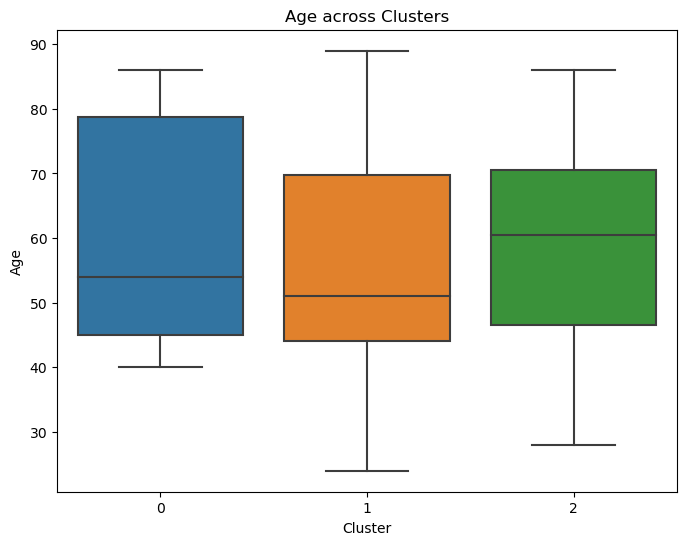

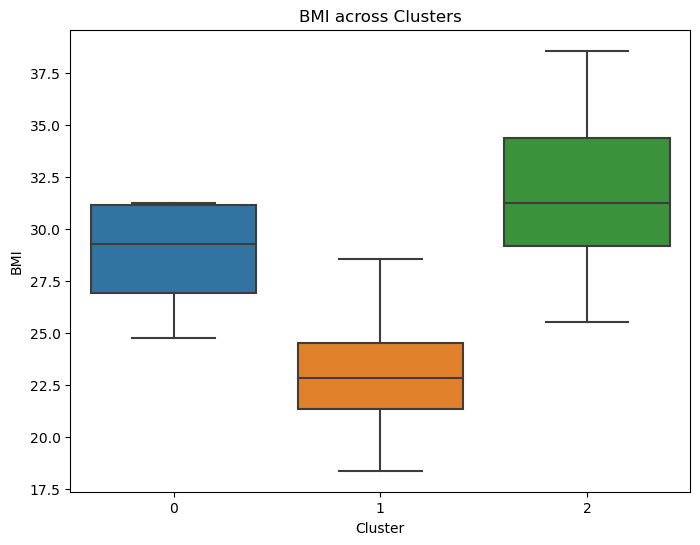

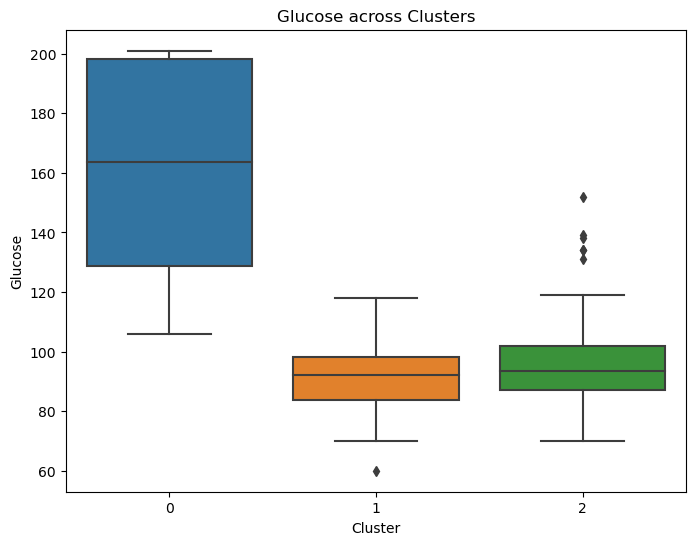

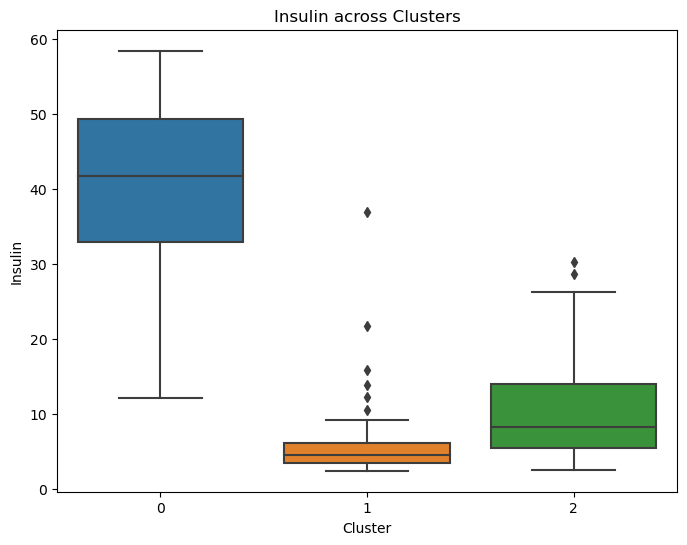

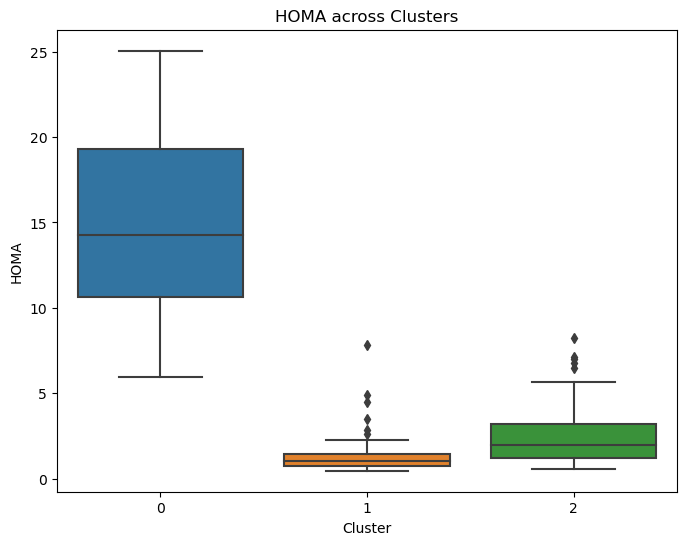

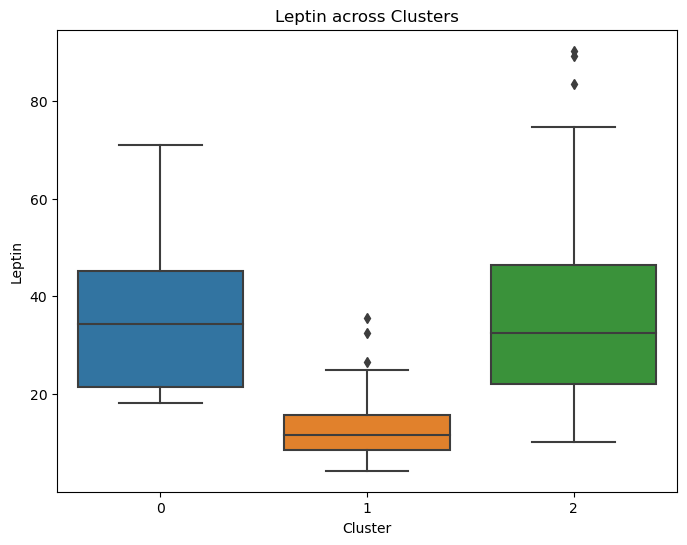

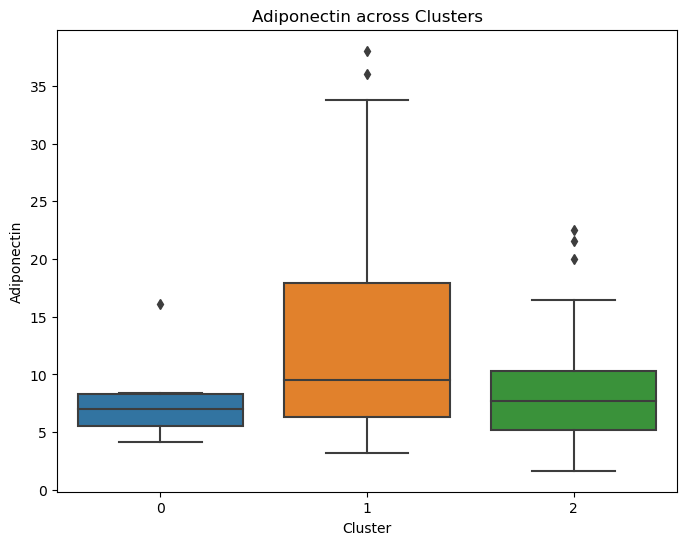

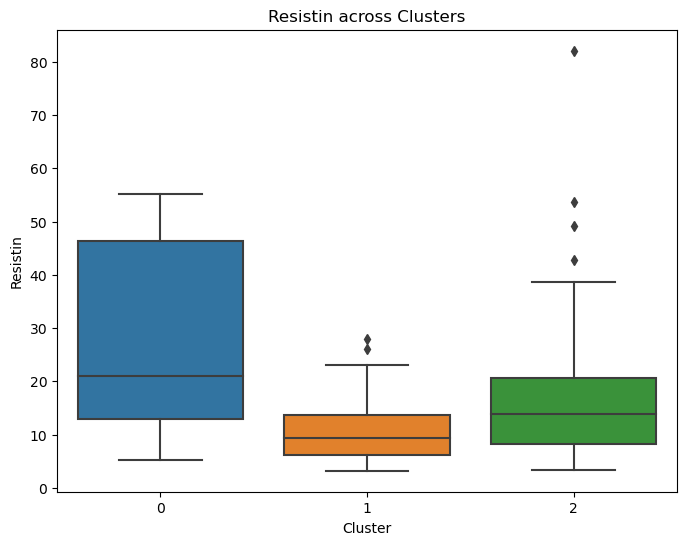

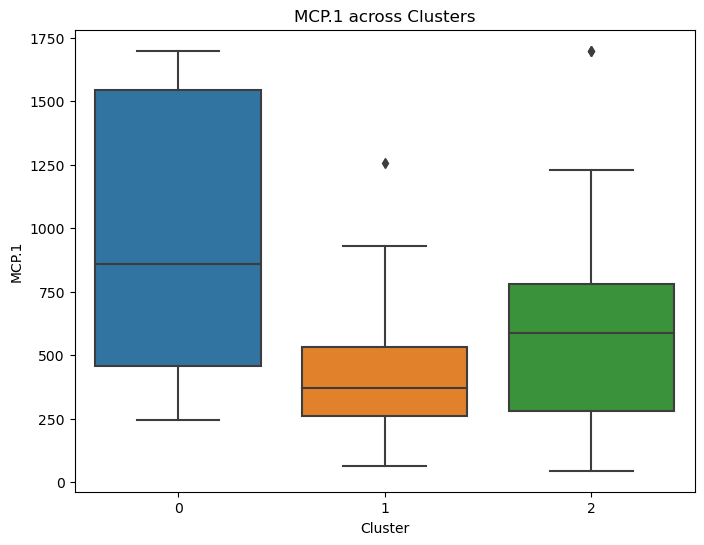

In [10]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'{column} across Clusters')
    plt.show()